# Prvi domaći zadatak iz Digitalne obrade signala
## Student: Vojin Vukčević 2021/0516

# Deo 1. Odabiranje, frekvencijska analiza signala i preklapanje u spektru

## 1.1

In [1]:
USE_WIDGETS = True

import numpy as np
if USE_WIDGETS:
    #from google.colab import output
    #output.enable_custom_widget_manager()
    %matplotlib widget
else:
    %matplotlib inline
import matplotlib as mpl
mpl.rc('text', usetex = False)
mpl.rc('font', family = 'serif', size = 16)
import matplotlib.pyplot as plt
import pickle
import scipy.signal as signal
import scipy.io as sio
import scipy.fft as fft


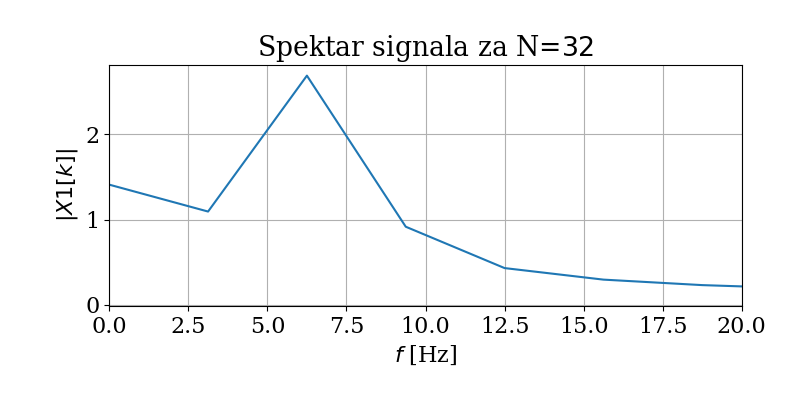

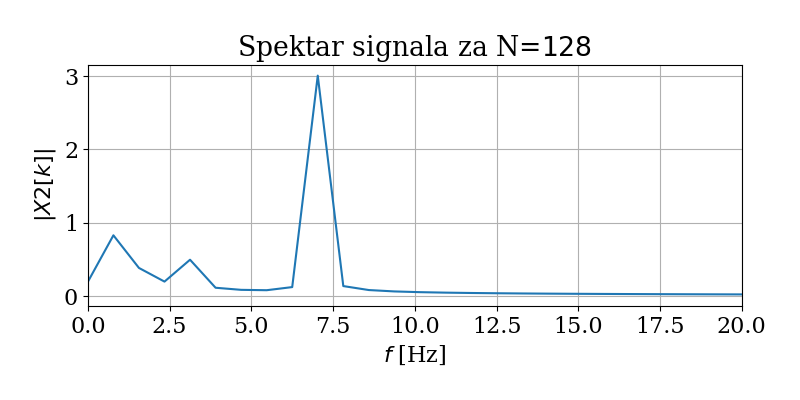

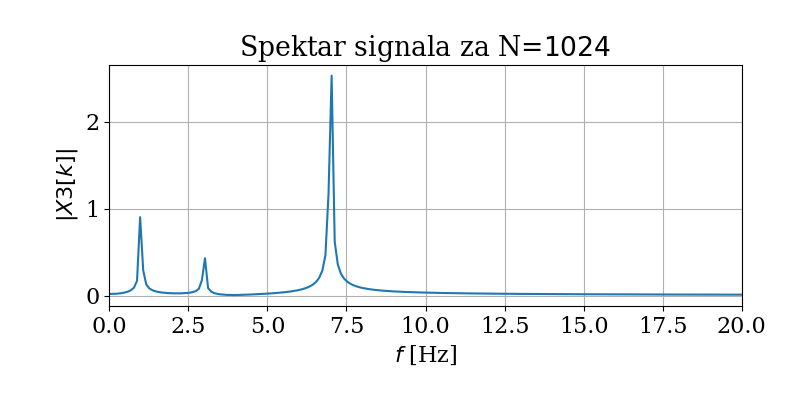

In [2]:
import numpy as np
#frekvencije na koje čine naš signal
f1 = 1
f2 = 3
f3 = 7

fs = 100 #frekvencija odabiranja

#broj tačaka u kome odabiramo odgovarajuće signale
N1 = 32
N2 = 128
N3 = 1024

#funkcija koja izracunava DFT signala x u N tacaka koje mu prosleimo
def DFT_calculation(N):
    n = np.arange(N)
    x = np.cos(2*np.pi*f1/fs*n) + 0.5*np.cos(2*np.pi*f2/fs*n) +3*np.cos(2*np.pi*f3/fs*n)
    X = fft.fft(x)
    return X

#funkcija koja plootuje DFT
def plotDFT(X,N,ylab):
    """
    Kada radimo fft.fft() dobijamo da je prva polovina spektra pozitivna, 
    a druga polovina predstavlja negativni deo spektra. Zato plotujemo od 0 do N//2.
    """
    f_full = np.arange(0,fs,fs/N) #frekvencijska osa
    X_amp = (2/N)*np.abs(X) #(2/N) koeficijent normalizacije da bi dobili vrednosi amp koje odgovaraju realnom signalu
    fig, ax = plt.subplots(figsize = (8, 4))
    plt.title(f'Spektar signala za N=${N}$')
    ax.set_xlabel('$f$ [Hz]')
    ax.set_xlim(0,fs//5) #uslov zad je da se plotuje do fs/5
    ax.set_ylabel(f'$|{ylab}[k]|$')   
    ax.plot(f_full[0:N//2], X_amp[0:N//2])
    fig.tight_layout(pad=1.5)
    ax.grid(True)
    
#izracunavanje trazenih furijeovih transformacija
X1 = DFT_calculation(N1)
X2 = DFT_calculation(N2)
X3 = DFT_calculation(N3)

#plotovanje dobijenih spektara
plotDFT(X1, N1, 'X1')
plotDFT(X2, N2, 'X2')
plotDFT(X3, N3, 'X3')

In [3]:
#funkcija koja trazi nakojim frekvencijama se nalaze vrhovi spektra
def Peak_find(X,N):
    X_amp = (2/N)*np.abs(X)
    peaksPos = signal.argrelextrema(X_amp[0:N//2], np.greater) 
    peaksPos = peaksPos[0]
    maxPeaksPos = np.argsort(-X_amp[peaksPos]) 
    maxPeakIndex = peaksPos[maxPeaksPos]
    maxPeakFreq = maxPeakIndex*(fs/N) #racunamo frekvenciju za zadati indeks
    print('Index:', maxPeakIndex[0:3], '=>', 'Frequency:', maxPeakFreq[0:3])

#traženje prve tri najveće frekvencije
Peak_find(X1,N1)
Peak_find(X2,N2)
Peak_find(X3,N3)

Index: [2] => Frequency: [6.25]
Index: [9 1 4] => Frequency: [7.03125 0.78125 3.125  ]
Index: [72 10 31] => Frequency: [7.03125    0.9765625  3.02734375]


Računamo spektre našeg signala za tri različite vrednosti N. <br>
U slučaju N=32 dobijamo najmanju rezoluciju od fs/N = 3.125. Takodje pri ovoj vrednosti N javlja nam se curenje spektra. Naše tražene frekvecnije nemaju jasno izražene vrhove, što potvrdjuje i činjenica da smo uspeli da detektujemo samo jedan vrh na frekvenciji f=6.25Hz. Ovaj vrh odgovara nasoj komopenti na 7Hz koja je najveća. Greška u ovom slučaju je 
e = |6.25-7| = 0.75 <br>
U slučaju N=128 dobijamo rezoluciju od 0.78. Curenje spektra je znatno manje od prethonog slucaja i sada nam se pojavljuju vrhovi na sve tri tražene frekvencije. Detektovali smo vrhove na frekvecijama 7.03123Hz, 0.78125Hz i 3.125Hz koje odgovaraju frekvecijama 7Hz, 1Hz i 3Hz respektvino. Ovo je mnogo bolje rešenje jer mozemo saznati sve frekvecnije našeg signala. Greska i dalje postoji ali je znatno manja.<br>
U slučaju N=1024 dobijamo rezoluciju od 0.09. Sva tri vrha su jasno izrazena i lako željene frekvecnije možemo pročitati sa slike. Detektujemo vrhove na frekvencijama 7.03125Hz, 0.9765625Hz, 3.02734375Hz koje odgovaraju frekvencijama naseg signala. Ovde dobijamo skoro zanemaljivu grešku i tako najprecizniju vrednost naših frekvecnija. <br>
Bitno je napomenuti da u slučaju N=128 dobijamo tačniju vrednost amplitude signala na 7Hz u odnosu na slučaj N=1024, jer je frekvencija signala celobrojni umnozak rezolucije 0.78236*8.96 = 7, pa imamo manje curenje spektra na njoj.<br>

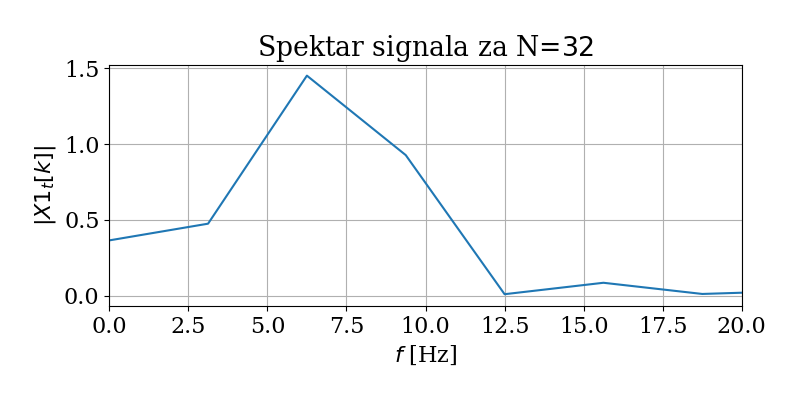

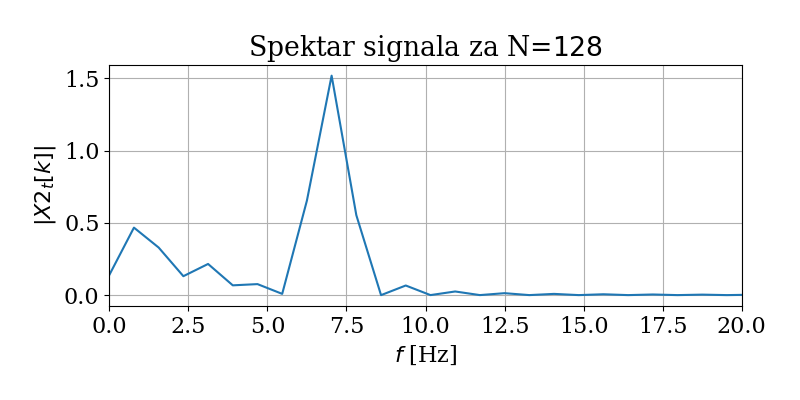

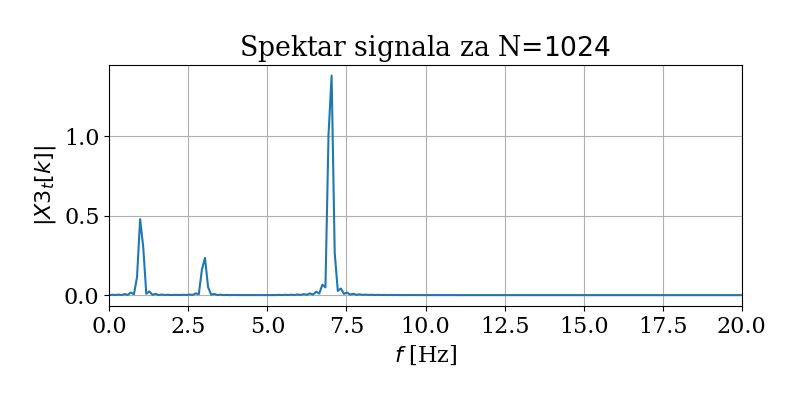

In [4]:
#funkcija koja primenjuje trougaonu prozorsku funkciju na signal x
def  triangle_window_apply(N):
    n = np.arange(N)
    x = np.cos(2*np.pi*f1/fs*n) + 0.5*np.cos(2*np.pi*f2/fs*n) +3*np.cos(2*np.pi*f3/fs*n)
    w = signal.windows.triang(N, sym = False)
    X = fft.fft(x*w,N)
    return X
#primena prozorske funkcije
X1_t = triangle_window_apply(N1)
X2_t = triangle_window_apply(N2)
X3_t = triangle_window_apply(N3)

#plotovanje dobijenih spektara
plotDFT(X1_t, N1, 'X1_t')
plotDFT(X2_t, N2, 'X2_t')
plotDFT(X3_t, N3, 'X3_t')

In [5]:
#koristimo funkciju za izracunavnanje frekvenicje na kojima se nalaze vrhovi kao u tacaki 3.
Peak_find(X1_t,N1)
Peak_find(X2_t,N2)
Peak_find(X3_t,N3)

Index: [2 5 7] => Frequency: [ 6.25  15.625 21.875]
Index: [9 1 4] => Frequency: [7.03125 0.78125 3.125  ]
Index: [72 10 31] => Frequency: [7.03125    0.9765625  3.02734375]


U slučaju N=32 nakon primene trougaone prozorske funkcije možemo detektovati tri vrha, za razliku od prošlog puta gde smo mogli samo jedan. Prvi vrh je na frekvenciji f=6.25Hz i isto kao i prošli put odgovara frekvencijskoj komponenti na 7Hz. Druga dva vrha su posledica curenja spektra i nisu nam korisni za nalaženje drugih frekvencija. <br>
Iako smo primenili prozorsku funkciju u slučaju N=32 nije moguće odrediti sve frekvencijske komponente. <br>
Takodje primenom prozorske funkcije dobili smo slabije signale.

U slučaju N=32 ni jedna prozorska funkcija nam neće omogućiti odredjivanje sve tri frekvencijske komponente, zato što
računamo spektar u nedovoljnom broju tačaka. <br>

## 1.2

Iz teorije znamo da curenje spektra neće postojati ukoliko je ispunjena sledeća jednačina: <br><br>
$$
f_i = k * \frac{f_s}{N}
$$ <br>
gde $k$ mora biti celobrojna vrednost. <br>
Iz ovog sledi da je: $$k_1 = \frac{2N}{25}$$ $$k_2 = \frac{13N}{125}$$ $$k_1 = \frac{66N}{625}$$ <br>
Naše željeno N treba biti najmanji zajednički sadržalac (25,125,625) kako bi svako k bio celobrojan broj. Odatle 
dobijamo rešenje $$N = 625$$

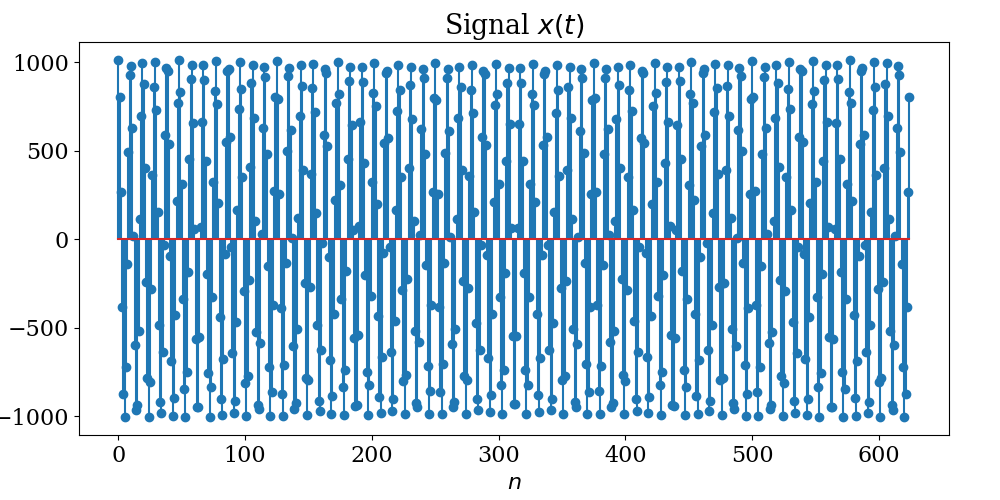

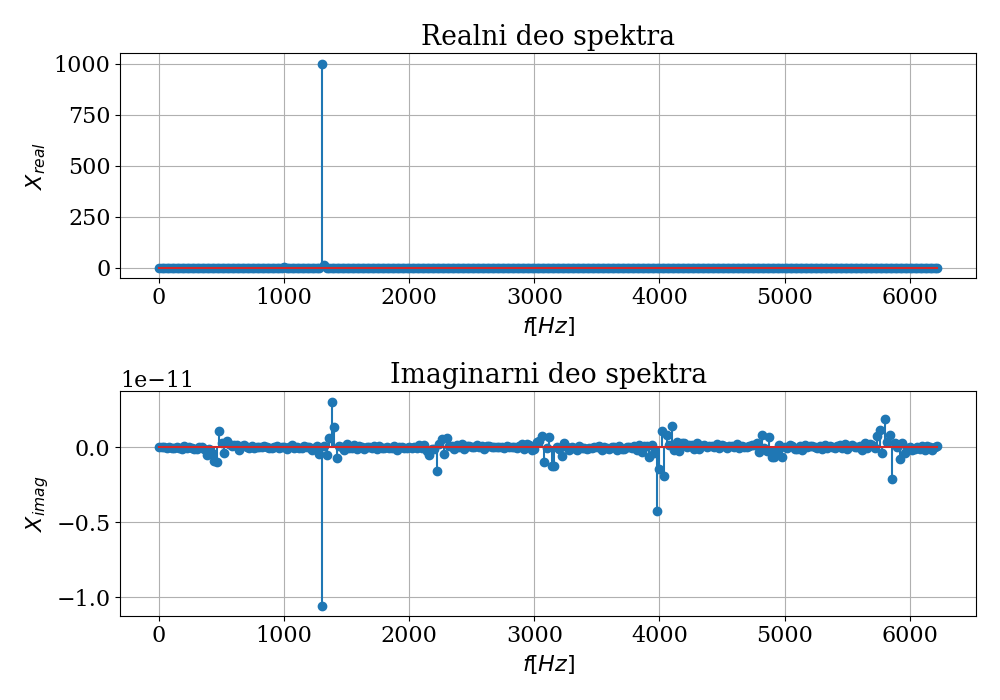

In [6]:
#frekvencije koje čine naš signal
f1 = 1000
f2 = 1300
f3 = 1320

fs = 12500 #frekvencija odabiranja 

N = 625 #broj odbiraka digitalnog signala
n = np.arange(625)

#naš signal x i njegova furijeova transformacija X
x = 5*np.cos(2*np.pi*f1/fs*n)+1000*np.cos(2*np.pi*f2/fs*n)+10*np.cos(2*np.pi*f3/fs*n) 
X = (2/N)*fft.fft(x)

f_full = np.arange(0,fs,fs/N) #frekvencijska osa

#plot signala u vremenskom domenu
fig, ax1 = plt.subplots(figsize = (10, 5))
fig.tight_layout(pad=1.5)
plt.title('Signal $x(t)$')
ax1.set_xlabel('$n$')
ax1.set_ylabel('$x[n]$')
ax1.stem(n,x[0:N]) #t = n/fs = n*Ts
#plt.grid(True)
plt.show()

#plot diskretne furijeove transformacije(prvi plot je realni deo, a drugi predstavlja imaginarni deo)
#nemamo curenja pa ce imag deo biti prakticno 0
fig, ax2 = plt.subplots(2, 1, figsize = (10, 7))
ax2[0].set_title('Realni deo spektra')
ax2[1].set_title('Imaginarni deo spektra')
ax2[0].set_xlabel('$f[Hz]$')
ax2[1].set_xlabel('$f[Hz]$')
ax2[0].set_ylabel('$X_{real}$')
ax2[1].set_ylabel('$X_{imag}$')
ax2[0].stem(f_full[0:N//2],np.real(X)[0:N//2])
ax2[1].stem(f_full[0:N//2],np.imag(X)[0:N//2])
ax2[0].grid(True)
ax2[1].grid(True)
plt.tight_layout()
plt.show()

## 1.3

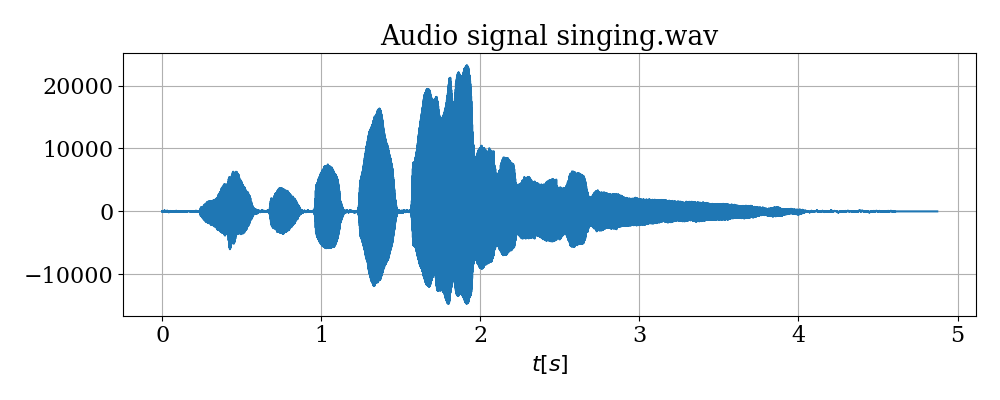

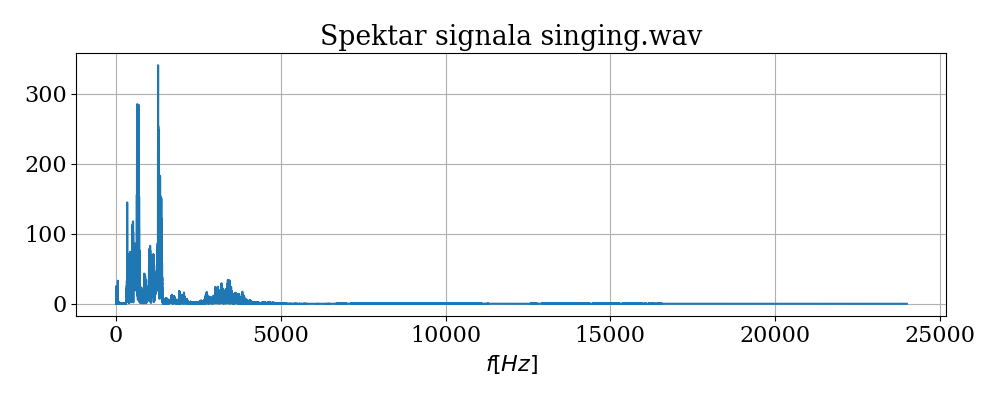

In [7]:
from scipy.io import wavfile
import IPython

#učitavanje audio signala, i pušanje na zvučnike
fs, singing = wavfile.read('dz1_signali/singing.wav')
IPython.display.display(IPython.display.Audio(singing, rate = fs))

N = len(singing)
n = np.arange(N)
#plot signala u vremenskom domenu 
fig, ax1 = plt.subplots(figsize = (10, 4))
ax1.set_title('Audio signal singing.wav')
ax1.set_xlabel('$t[s]$')
ax1.plot(n/fs,singing)
ax1.grid(True)
plt.tight_layout()
plt.show()

#racunanje fft našeg signala
X = (2/N)*fft.fft(singing)
f_full = np.arange(0,fs,fs/N)

#plot spektra našeg signala.
fig, ax2 = plt.subplots(figsize = (10,4))
ax2.set_title('Spektar signala singing.wav')
ax2.set_xlabel('$f[Hz]$')
ax2.plot(f_full[0:N//2],np.abs(X[0:N//2]))
ax2.grid(True)
plt.tight_layout()
plt.show()

In [8]:
#funckija koja odredjuje učestanost do koje signal ima odredjeni procenat ukupne energije.
def occupiedBandwith(x, energyPct, fs):
    E_total =0
    k_obw= 0
    E = 0
    N = len(x)
    X = fft.fft(x)
    #prelja racuna ukupnu energiju naseg signala
    for i in range(N//2):
        E_total += np.abs(X[i])**2
    E_total = E_total/N
    '''
    Sledeca petlja prolazi kroz frekvencije i racuna sabira enerigju do trenutno posmatrane frek.
    Ukoliko energija predje zadat procenat totalne energije, frekvencija se pamti i izlazi se iz petlje.
    Ono sto dobijamo je clan koji odgovara nasoj frekvenicji, odakle možemo naći željenu frekveniju. 
    '''
    for i in range(N//2):
        E += np.abs(X[i])**2
        if (E/N >= E_total*energyPct):
            k_obw=i
            break
    return k_obw

In [9]:
obw=occupiedBandwith(singing, 0.9999, fs)
f_obw = obw*(fs/N)
f_snew = f_obw*2
print(f'Frekvecnija do koje naš signal ima 99.99% ukupne energije je {f_obw:.2f}')

Frekvecnija do koje naš signal ima 99.99% ukupne energije je 4633.49


### Dobijamo da se 99.99% energije našeg signala sadrži do frekvecije od 4633.5Hz. Primenom teoreme odabiranja možemo smanjiti našu učestanost odabiranja na fs=2*f_max=9267Hz, sa prethodne 48kHz. Dobili smo smanjenje od ~5 puta. 

In [10]:
m = int(fs/f_snew)
#naš nov signal x_dm
x_dm = singing[::m]

#puštanje na zvučnik naš nov signal, primećujemo da nema razlike u odnosu na original
IPython.display.display(IPython.display.Audio(x_dm, rate = f_snew))

In [11]:
m = 20
#nov signal x_dm za m koje je veće od prethodnog
x_dm = singing[::m]
#puštanje na zvučnik naš nov signal
IPython.display.display(IPython.display.Audio(x_dm, rate = fs/m))

### Primećujemo da se javlja distorzija signala, zato što je učestanost pala ispod Nikvistove granice.

# Deo 2: Spektrogram

In [12]:
def dosSpectogram(x, fs, window, noverlap, nfft, fMaxShow):
    hop = len(window) - noverlap #koliko skacemo pri svakoj iteraciji 
    nSeg = (len(x) - len(window)) // hop + 1 #broj segmenata

    is_complex = np.iscomplexobj(x) #ispitujemo da li je ulazni signal realan ili kompleksan
    
    fMaxIndex = nfft*fMaxShow//fs
    S = []
    t = []

    for i in range(nSeg):
        #odsecamo traženi deo ulaznog signala
        x_segment = x[i*hop:i*hop + len(window)] * window 
        #furijeova transformacija trenutnog dela sginala koji posmatramo u nfft tacaka
        X = fft.fft(x_segment, nfft)
        if is_complex:
            #ukoliko je signal kompleksan moramo vrsiti pomeranje spektra kako bismo dobili zeljeni rezultat od -fMaxShow do fMaxShow
            X = fft.fftshift(X)
            mid = nfft // 2
            S.append(X[mid - fMaxIndex: mid + fMaxIndex])
        else:
            S.append(X[:fMaxIndex])

        t.append(i*hop / fs) 

    S = np.array(S).T
    t = np.array(t)

    if is_complex:
        f = np.linspace(-fMaxShow, fMaxShow, S.shape[0])
    else:
        f = np.linspace(0, fMaxShow, S.shape[0])

    return S, f, t

In [13]:
#kreiramo naš chirp signal sa zadatim vrednostima
fs = 8000
T = 5
t_axis = np.linspace(0, T, fs * T, endpoint=False)

x_chirp = signal.chirp(t_axis, f0=0, f1=fs/2, t1=T, method='linear')
IPython.display.display(IPython.display.Audio(x_chirp, rate = fs))

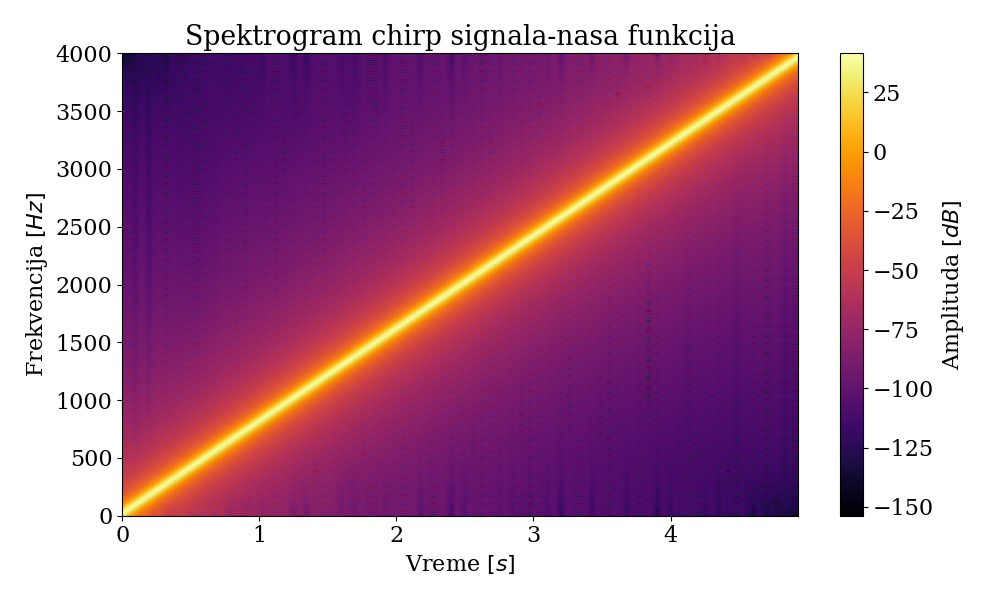

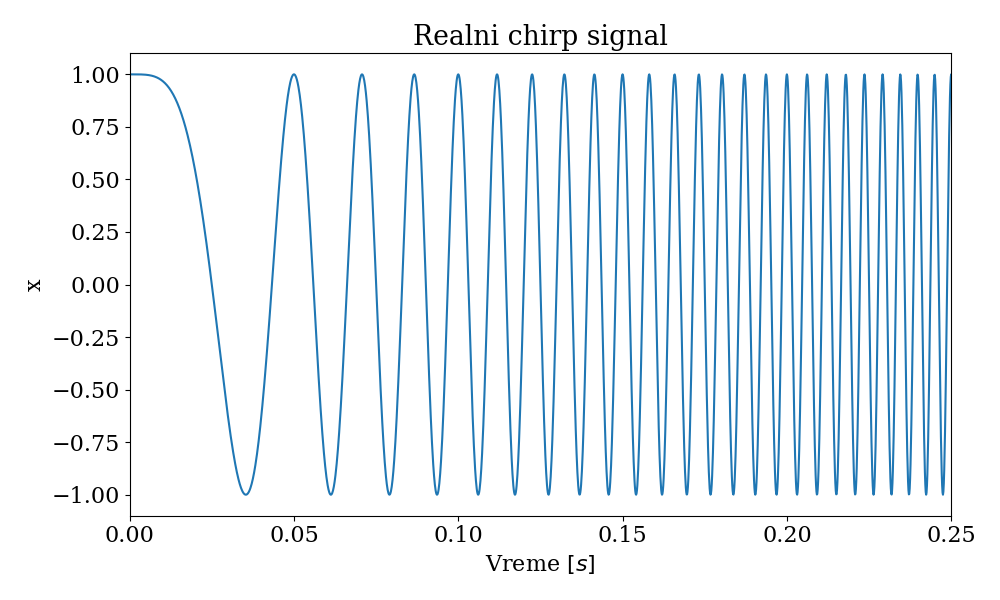

In [16]:
window = signal.windows.hann(512, sym=False) #nasa prozorska funkcija

S, f, t = dosSpectogram(x_chirp, fs, window, noverlap=256, nfft=2048, fMaxShow=4000) #racunanje spektrograma

S_dB = 20 * np.log10(np.abs(S) + 1e-12) #amplituda u dB

plt.figure(figsize=(10, 6))
plt.plot(t_axis,x_chirp)
plt.xlim(0,0.25)
plt.xlabel("Vreme $[s]$")
plt.ylabel("x")
plt.title("Realni chirp signal")
plt.tight_layout()
#plotovanje našeg spektrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, S_dB, shading='gouraud', cmap = 'inferno')
plt.xlabel("Vreme $[s]$")
plt.ylabel("Frekvencija $[Hz]$")
plt.title("Spektrogram chirp signala-nasa funkcija")
plt.colorbar(label="Amplituda $[dB]$")
plt.tight_layout()
plt.show()

In [ ]:
fu,tu,Su = signal.spectrogram(x_chirp, fs, window = 'hann', nperseg=512, noverlap = 256, nfft= 2048)
Su_dB = 20 * np.log10(np.abs(Su) + 1e-12) #amplituda u dB
plt.figure(figsize=(10, 6))
plt.pcolormesh(tu, fu, Su_dB, shading='gouraud', cmap = 'inferno')
plt.xlabel("Vreme $[s]$")
plt.ylabel("Frekvencija $[Hz]$")
plt.title("Spektrogram chirp signala ugradjena funkcija")
plt.colorbar(label="Amplituda $[dB]$")
plt.tight_layout()
plt.show()

In [ ]:
window = signal.windows.hann(128, sym=False) #nasa prozorska funkcija

S, f, t = dosSpectogram(x_chirp, fs, window, noverlap=64, nfft=2048, fMaxShow=4000) #racunanje spektrograma

S_dB = 20 * np.log10(np.abs(S) + 1e-12) #amplituda u dB

#plotovanje našeg spektrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, S_dB, shading='gouraud', cmap = 'inferno')
plt.xlabel("Vreme $[s]$")
plt.ylabel("Frekvencija $[Hz]$")
plt.title("Spektrogram chirp signala")
plt.colorbar(label="Amplituda $[dB]$")
plt.tight_layout()
plt.show()

In [ ]:
window = signal.windows.hann(1024, sym=False) #nasa prozorska funkcija

S, f, t = dosSpectogram(x_chirp, fs, window, noverlap=256, nfft=2048, fMaxShow=4000) #racunanje spektrograma

S_dB = 20 * np.log10(np.abs(S) + 1e-12) #amplituda u dB

#plotovanje našeg spektrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, S_dB, shading='gouraud', cmap = 'inferno')
plt.xlabel("Vreme $[s]$")
plt.ylabel("Frekvencija $[Hz]$")
plt.title("Spektrogram chirp signala")
plt.colorbar(label="Amplituda $[dB]$")
plt.tight_layout()
plt.show()

In [ ]:
window = signal.windows.hann(2024, sym=False) #nasa prozorska funkcija

S, f, t = dosSpectogram(x_chirp, fs, window, noverlap=256, nfft=2048, fMaxShow=4000) #racunanje spektrograma

S_dB = 20 * np.log10(np.abs(S) + 1e-12) #amplituda u dB

#plotovanje našeg spektrograma
plt.figure(figsize=(10, 6))
plt.pcolormesh(t, f, S_dB, shading='gouraud', cmap = 'inferno')
plt.xlabel("Vreme $[s]$")
plt.ylabel("Frekvencija $[Hz]$")
plt.title("Spektrogram chirp signala")
plt.colorbar(label="Amplituda $[dB]$")
plt.tight_layout()
plt.show()

# Deo 3. Implementacija konvolucije dugackog signala sa kratkim impulsnim odzivom

In [ ]:
def blockConvolution(x, h, blockLenght):
    #radimo konvoluciju blok po blok, zato ce ukupna duzina rezultujuceg signala biti Nh+N(bloka) -1
    Nh = len(h)
    N = blockLenght + Nh - 1
    
    
    if(len(x) % blockLenght != 0):
        pad = np.zeros(blockLenght - (len(x) % blockLenght))
        x = np.concatenate((x,pad))
    nOfSeg = ((len(x)-(Nh-1)+blockLenght - 1)//blockLenght)
    x = np.concatenate((np.zeros(Nh-1),x))
    
    
    y = []
    x_block = []
    #prolazimo kroz svaki segment dok ne dodjemo do kraja signala
    for i in range(nOfSeg):
        x_block = x[i*blockLenght: i*blockLenght + blockLenght + Nh-1]
        y_block = np.real(fft.ifft(fft.fft(x_block,N)*fft.fft(h,N)))[Nh-1:]
        '''     
        conv(proizvod FT signala)->      X[k]        *      H[k]
        zatim izvrsavamo inverznu furijeovu transformaciju (fft.ifft())
        uzimao samo realni reo jer ne postoji kompleksni u stvarnom zivotu (np.real())
        '''
        y.extend(y_block)
    return y[:len(birds_airplane) + Nh -1]

In [ ]:
fs, birds_airplane = wavfile.read('dz1_signali/birds_airplane.wav')
hBirds = pickle.load(open('dz1_signali/impulse_response_birds.pkl','rb'))
blen = 6*len(hBirds)
#racunanje konvolucije pomocu prethodno napisane funkcije
y_func = blockConvolution(birds_airplane,hBirds, blen)
#racunanje konvolucije preko ugradjene funkcije
y_fft_func = signal.convolve(birds_airplane, hBirds, method='direct')
diff = np.abs(y_fft_func-y_func)

In [ ]:
fig, ax2 = plt.subplots(2, 1, figsize = (10, 7))
ax2[0].set_title('Signal dobijen korišćenjem funkcije blockConvolution')
ax2[1].set_title('Signal dobijen korišćenjem funkcije signal.convolve')
ax2[1].set_xlabel('$t[s]$')
ax2[0].set_xlabel('$t[s]$')
ax2[0].plot(np.arange(len(y_func))/fs, y_func)
ax2[1].plot(np.arange(len(y_fft_func))/fs, y_fft_func)
plt.tight_layout()
ax2[0].grid(True)
ax2[1].grid(True)
plt.show()
fig ,ax = plt.subplots(figsize =(10,3))
ax.plot(np.arange(len(diff))/fs, diff)
ax.set_title('Greška prethodna dva signala')
ax.set_xlabel('$t[s]$')
ax.set_ylabel('$Δ$')
plt.tight_layout()
plt.grid(True)
plt.show()

In [ ]:
window = signal.hann(512)
fo, to, S_o = signal.spectrogram(birds_airplane, fs, window, noverlap = 256, nfft = 2048)
S_o = 20 * np.log10(np.abs(S_o) + 1e-12)
fc, tc, S_c = signal.spectrogram(np.array(y_func), fs, window, noverlap = 256, nfft = 2048)
S_c = 20 * np.log10(np.abs(S_c) + 1e-12)
fig , ax = plt.subplots(1, 2, figsize = (13,6))
ax[0].pcolormesh(to, fo, S_o, shading='gouraud', cmap ='inferno')
ax[0].set_xlabel("Vreme $[s]$")
ax[0].set_ylabel("Frekvencija $[Hz]$")
ax[0].set_title("Spektrogram originalnog signala")
plt.tight_layout()
ax[1].pcolormesh(tc, fc, S_c, shading='gouraud', cmap ='inferno')
ax[1].set_xlabel("Vreme $[s]$")
ax[1].set_ylabel("Frekvencija $[Hz]$")
ax[1].set_title("Spektrogram filtriranog signala")
plt.tight_layout()
plt.show()

Reč je o visokopropusnom filtru.

In [ ]:
import time
Nx = 100000
Nh = 128
f1 = 7
nx = np.arange(Nx)
nh = np.arange(Nh)
x = np.cos(2*np.pi*f1/fs*nx)
h = np.cos(2*np.pi*nh)
blen = 5*len(h)+len(h)-1
blockLenght = [2**8, 2**9, 2**10, 2**11, 2**12, 2**13, 2**14, 2**15, 2**16]
t_per_lenght = []
for i in blockLenght:
    t_sum = 0
    for j in range(150):
        t = time.time()
        y = blockConvolution(x,h,blen)
        t_sum += (time.time()-t)
    t_average = t_sum/100
    t_per_lenght.append(t_average)
fig ,ax = plt.subplots(figsize =(10,3))
ax.plot(['2**8', '2**9', '2**10', '2**11', '2**12', '2**13', '2**14', '2**15', '2**16'], t_per_lenght)

# 4. Realizacija elementarnog sistema za prenos digitalnog signala

In [ ]:
poruka = "Ovo je prvi domaci iz digitalne obrade signala!!! Ovo je prvi domaci iz digitalne obrade signala!!!!"
biti = ''.join([format(ord(c), '08b') for c in poruka])
bit_niz = np.array([int(b) for b in biti])

In [ ]:
import numpy as np

def rrcFilter(beta, Nsps, filter_len_symbols):
    """
    Generiše koeficijente Root-Raised Cosine (RRC) filtra.
    
    Argumenti:
    beta : float - Roll-off faktor (između 0 i 1)
    Nsps : int   - Broj odbiraka po simbolu (Samples Per Symbol)
    filter_len_symbols : int - Dužina filtra izražena u broju simbola
    
    Povratna vrednost:
    h : numpy array - Niz koeficijenata impulsnog odziva filtra
    """
    
    # Ukupan broj koeficijenata (mora biti neparan da bi filter bio simetričan)
    N = filter_len_symbols * Nsps
    n = np.arange(-N/2, N/2 + 1)
    
    # Inicijalizacija niza koeficijenata
    h = np.zeros(len(n))
    
    # Skaliranje vremena (normalizovano na Nsps)
    # t_over_T = n / Nsps
    
    for i, val in enumerate(n):
        t = val / Nsps
        
        # Slučaj 1: Centralni odbirak (t = 0)
        if val == 0:
            h[i] = 1.0 - beta + (4 * beta / np.pi)
            
        # Slučaj 2: Polovi (imenilac u formuli je nula)
        # To se dešava kada je 1 - (4 * beta * t)^2 = 0 => t = +/- 1/(4*beta)
        elif beta != 0 and np.abs(val) == Nsps / (4 * beta):
            h[i] = (beta / np.sqrt(2)) * (
                (1 + 2/np.pi) * np.sin(np.pi / (4 * beta)) + 
                (1 - 2/np.pi) * np.cos(np.pi / (4 * beta))
            )
            
        # Slučaj 3: Opšta formula
        else:
            numer = (np.sin(np.pi * t * (1 - beta)) + 
                     4 * beta * t * np.cos(np.pi * t * (1 + beta)))
            denom = np.pi * t * (1 - (4 * beta * t)**2)
            h[i] = numer / denom
            
    # Normalizacija energije (Veoma važno!)
    # Prema Parsevalovoj teoremi, želimo da filter ima jediničnu energiju 
    # kako ne bi pojačavao ili slabi signal/šum.
    return h / np.sqrt(np.sum(h**2))

In [ ]:
#generisanje impulsnog odziva
h = rrcFilter(0.3, 16, 8)
N = len(h)

x_osa_n = np.arange(-N//2+1,N//2+1)
H = fft.fft(h,1024)
H_s = fft.fftshift(H)
x_osa_f = np.linspace(-16/2, 16/2,len(H))
fig, ax2 = plt.subplots(2,1,figsize = (12, 9))
ax2[0].set_title('Vremenski oblik impulsnog signala')
ax2[0].set_xlabel('$n$')
ax2[0].set_ylabel('Amplituda $h_{rcc}$')
ax2[0].plot(x_osa_n, h)

ax2[1].plot(x_osa_f,np.abs(H_s)/np.max(np.abs(H_s)))
ax2[1].set_xlim(-1,1)
ax2[1].set_title('Spektar impulsnog odziva')
ax2[1].set_xlabel('Frekvecnija $(f/f_{sym})$')
ax2[1].set_ylabel('Magnituda')

plt.tight_layout()
ax2[0].grid()
ax2[1].grid()

In [ ]:
#kovolucija dva RCC filtra
y = np.convolve(h, h)
x_osa_n = np.arange(-len(y)//2+1,len(y)//2+1)
fig, ax = plt.subplots(2,1,figsize = (12, 9))
ax[0].plot(x_osa_n,y)
ax[0].set_title('Vremenski dijagram kovolucije dva impulsna odziva')
ax[0].set_xlabel('$n$')
ax[0].set_ylabel('$Amplituda$')

Y = fft.fft(y,1024)
Y_s = fft.fftshift(Y)
x_osa_f = np.linspace(-16/2, 16/2,len(Y_s))
ax[1].plot(x_osa_f,np.abs(Y_s)/np.max(np.abs(Y_s)))
ax[1].set_xlim(-1,1)
ax[1].set_title('Spektar konvolucije dva impulsna odziva')
ax[1].set_xlabel('Frekvecnija $(f/f_{sym})$')
ax[1].set_ylabel('Magnituda')
plt.tight_layout()
ax[0].grid(True)
ax[1].grid(True)
plt.show()

In [ ]:
s = np.zeros(len(bit_niz)*16, dtype = complex)
for i in range(len(bit_niz)):
    if (bit_niz[i] == 0):
        s[i*16] = np.sqrt(2)*complex(1,1)#(1+1j)
    else:
        s[i*16] = np.sqrt(2)*complex(-1,-1)#(-1-1j)

In [ ]:
msg_conv_real = signal.convolve(np.real(s), h, method='direct')
msg_conv_imag = signal.convolve(np.imag(s), h, method='direct')

msg_conv_complex = msg_conv_real + 1j*msg_conv_imag

fig, ax = plt.subplots(1,2, figsize = (15,4))
ax[0].plot(np.arange(128),msg_conv_real[0:128])
ax[1].plot(np.arange(128),msg_conv_imag[0:128], color='red')
ax[0].set_title('Konvolucija realnog dela')
ax[1].set_title('Konvolucija imaginarnog dela')
ax[0].set_xlabel('$n$')
ax[1].set_xlabel('$n$')
plt.tight_layout()
ax[0].grid(True)
ax[1].grid(True)
plt.show()

MSG_C = fft.fft(msg_conv_complex,1024)
MSG_C = fft.fftshift(MSG_C)
x_osa_f = np.linspace(-16/2, 16/2,len(MSG_C))
fig, ax1 = plt.subplots(figsize = (15,4))
ax1.plot(x_osa_f,np.abs(MSG_C)/np.max(np.abs(MSG_C)))
ax1.set_xlim(-1,1)
ax1.set_title('Spektar konvolucije nase poruke i impulsa')
ax1.set_xlabel('Frekvecnija $(f/f_{sym})$')
ax1.set_ylabel('Magnituda')
plt.tight_layout()
ax1.grid(True)
plt.show()

In [ ]:
fc = 400*10**6
fs =1.6*10**9
t = np.arange(len(msg_conv_complex))/fs
carry = np.exp(1j*2*np.pi*fc*t)

msg_modulisan = msg_conv_complex * carry
MSG_MODULISAN = fft.fft(msg_modulisan, 1024)
MSG_MODULISAN_S = fft.fftshift(MSG_MODULISAN)
freq = fft.fftfreq(1024, 1/fs)
freq_s = fft.fftshift(freq)
fig, ax = plt.subplots(figsize= (10,4))
ax.plot(freq_s,np.abs(MSG_MODULISAN_S))
ax.set_title('Spektar modulisanog signala')
ax.set_xlabel('Frekvencija $[x 100 MHz]$')
ax.set_ylabel('Magnituda')
ax.set_xlim(0,6*10**8)
plt.tight_layout()
ax.grid(True)
plt.show()

In [ ]:
msg_demodulisani = msg_modulisan * np.exp(-2j*np.pi*fc*t)
msg_filtriran =np.convolve(msg_demodulisani, h)
rekonstruisani_simboli = msg_filtriran[128::16]
rekonstruisani_biti =[]
for i in rekonstruisani_simboli:
    k1 = np.sqrt((np.real(i)-np.sqrt(2))**2+(np.imag(i)-np.sqrt(2))**2)
    k2 = np.sqrt((np.real(i)+np.sqrt(2))**2+(np.imag(i)+np.sqrt(2))**2)
    if (k1<k2):
        rekonstruisani_biti.append(0)
    else:
        rekonstruisani_biti.append(1)
rekonstruisana_poruka = ""
for i in range(0, len(rekonstruisani_biti), 8):
    bajt = rekonstruisani_biti[i:i+8]
    char_kod = int("".join(map(str, bajt)), 2)
    rekonstruisana_poruka += chr(char_kod)

print(f"Original: {poruka} -> Rekonstruisano: {rekonstruisana_poruka}")

In [ ]:
gausov_sum = type='complex'
gausov_sum = np.random.randn(len(msg_modulisan)) +1j*np.random.randn(len(msg_modulisan))
msg_demodulisani = msg_modulisan * np.exp(-2j*np.pi*fc*t)*gausov_sum
msg_filtriran =np.convolve(msg_demodulisani, h)
rekonstruisani_simboli = msg_filtriran[128::16]
rekonstruisani_biti =[]
for i in rekonstruisani_simboli:
    k1 = np.sqrt((np.real(i)-np.sqrt(2))**2+(np.imag(i)-np.sqrt(2))**2)
    k2 = np.sqrt((np.real(i)+np.sqrt(2))**2+(np.imag(i)+np.sqrt(2))**2)
    if (k1<k2):
        rekonstruisani_biti.append(0)
    else:
        rekonstruisani_biti.append(1)
rekonstruisana_poruka = ""
for i in range(0, len(rekonstruisani_biti), 8):
    bajt = rekonstruisani_biti[i:i+8]
    char_kod = int("".join(map(str, bajt)), 2)
    rekonstruisana_poruka += chr(char_kod)

print(f"Original: {poruka} -> Rekonstruisano: {rekonstruisana_poruka}")